In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
rest = pd.read_csv('/Volumes/Database/Research/ozone-budget/result_df_UKESM1_3_0_NN_width_64_dropout_0.1_90.csv')
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(1217).csv')

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [153]:
rest['tas'] = data['tas']
rest['pan'] = data['pan']
rest['photo1d'] = data['photo1d']

rest['o3_mole'] = rest['o3']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['no_mole'] = rest['no']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['no2_mole'] = rest['no2']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['oh_mole'] = rest['oh']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['h2o_mole'] = rest['h2o']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['hno3_mole'] = rest['hno3']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['pan_mole'] = rest['pan']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)

rest['ho2_mole'] = rest['HO₂']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)
rest['ch3o2_mole'] = rest['CH₃O₂']*1.01325*10**5/rest['tas']*7.243*10**7*(10**9)

rest['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/rest['tas'])
rest['k_oh_no2'] = 6.5*10**(-11)
rest['k_no_ho2'] = data['k_no_ho2']
rest['k_no_ch3o2'] = data['k_no_ch3o2']
rest['k_o1d_h2o'] = 2.14*10**(-10)
rest['k_o3_ho2'] = data['k_o3_ho2']
rest['k_o3_oh'] = data['k_o3_oh']

In [116]:
rest['k_oh_no2'].describe()

count    9.720000e+05
mean     6.500000e-11
std      9.202260e-22
min      6.500000e-11
25%      6.500000e-11
50%      6.500000e-11
75%      6.500000e-11
max      6.500000e-11
Name: k_oh_no2, dtype: float64

### A proportion (${\lambda}$) of the O(${^1}$D) formed by the photolysis of O${_3}$ reacts with H${_2}$O to form 2 OH radicals. Here we can estimate the ${\lambda}$ based on steady-state assumption. 

In [159]:
rest['lambda'] = (2*rest['ho2_mole']*rest['ho2_mole']*rest['k_ho2_ho2']+0*rest['k_oh_no2']*rest['oh_mole']*rest['no2_mole'])/(rest['photo1d']*rest['o3_mole']*2)
rest.replace([np.inf, -np.inf], 0, inplace=True)

In [118]:
rest

,HO₂,CH₃O₂,kₓROₓ,O¹D,kₐalkenes,PO₃̂,LO₃̂,longitude,latitude,t,...,pan_mole,ho2_mole,ch3o2_mole,k_ho2_ho2,lambda,country,loc,k_oh_no2,k_oh_no2_2,HO2_pred
0,7.280630e-12,4.660699e-11,2.658377e-28,9.069226e-22,3.638301e-28,52922.427962,55050.156165,1.0,-89.0,1.0,...,5.728714e+08,2.140922e+08,1.370512e+09,2.435001e-12,0.027368,南极地区,911.0,6.500000e-11,3.000000e-12,2.900940e+08
1,7.281262e-12,4.661300e-11,2.658434e-28,9.071393e-22,3.638602e-28,52965.764285,54871.991745,3.0,-89.0,1.0,...,5.731662e+08,2.141412e+08,1.370884e+09,2.435833e-12,0.027367,南极地区,2911.0,6.500000e-11,3.000000e-12,2.901661e+08
2,7.261796e-12,4.650557e-11,2.651481e-28,9.122343e-22,3.619068e-28,52870.091914,54895.091728,5.0,-89.0,1.0,...,5.734841e+08,2.135954e+08,1.367895e+09,2.436566e-12,0.027211,南极地区,4911.0,6.500000e-11,3.000000e-12,2.902572e+08
3,7.261786e-12,4.651602e-11,2.652178e-28,9.121947e-22,3.614559e-28,52937.939253,54734.487253,7.0,-89.0,1.0,...,5.742442e+08,2.136102e+08,1.368299e+09,2.436980e-12,0.027164,南极地区,6911.0,6.500000e-11,3.000000e-12,2.905309e+08
4,7.261663e-12,4.652939e-11,2.652065e-28,9.120833e-22,3.616232e-28,52988.650057,54586.117915,9.0,-89.0,1.0,...,5.748282e+08,2.136306e+08,1.368847e+09,2.437640e-12,0.027147,南极地区,8911.0,6.500000e-11,3.000000e-12,2.906529e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,1.387260e-14,8.797916e-14,2.047809e-31,7.619175e-25,8.489538e-31,134.963316,40.906482,-9.0,89.0,60.0,...,1.858374e+09,4.196995e+05,2.661708e+06,2.609834e-12,0.000000,NaN,-8911.0,6.500000e-11,3.000000e-12,0.000000e+00
971996,1.259138e-14,8.829640e-14,1.989219e-31,9.184654e-25,1.161733e-30,80.140742,50.120315,-7.0,89.0,60.0,...,1.859839e+09,3.809160e+05,2.671153e+06,2.609464e-12,0.000000,NaN,-6911.0,6.500000e-11,3.000000e-12,0.000000e+00
971997,1.375304e-14,9.701694e-14,2.127389e-31,9.824132e-25,1.220742e-30,49.788435,53.173863,-5.0,89.0,60.0,...,1.861512e+09,4.160313e+05,2.934776e+06,2.609041e-12,0.000000,NaN,-4911.0,6.500000e-11,3.000000e-12,0.000000e+00
971998,1.362856e-14,9.592115e-14,2.115101e-31,9.784521e-25,1.211627e-30,70.603743,52.861757,-3.0,89.0,60.0,...,1.862572e+09,4.122546e+05,2.901550e+06,2.608867e-12,0.000000,NaN,-2911.0,6.500000e-11,3.000000e-12,0.000000e+00


### Map the geographical distribution of the ${\lambda}$

In [5]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
rest = rest.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
rest = rest.drop(['province','state'], axis=1)

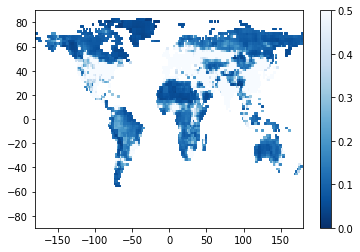

In [160]:
rest['loc'] = rest['longitude']*1000 + rest['latitude']
#rest_land = rest.dropna()
rest_land = rest_land[rest_land['latitude'] >= -60]
rest_lambda = rest_land[rest_land['lambda'] < 100]
rest_map = rest_lambda.groupby(['loc']).median()

cm = plt.cm.get_cmap('Blues_r')
x = rest_map['longitude']
y = rest_map['latitude']
z = rest_map['lambda']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [161]:
rest_lambda['lambda'].describe()

count    232140.000000
mean          0.533065
std           0.967850
min           0.000000
25%           0.079873
50%           0.153922
75%           0.556572
max          51.415416
Name: lambda, dtype: float64

In [149]:
np.percentile(rest_lambda['lambda'],99)

0.9469534073844809

In [122]:
rest_lambda['oh_mole'].mean()

1163113.3931920552

In [123]:
rest_lambda['ho2_mole'].mean()

239395120.51498237

In [124]:
rest_lambda['photo1d'].mean()

6.544539363086666e-06

### Use pure linear model to estimate the scale of ${\alpha}$

In [136]:
HO2 = rest['ho2_mole'].median()
O3 = rest['o3_mole'].median()
JO1D = rest['photo1d'].median()
OH = rest['oh_mole'].median()
NO2 = rest['no2_mole'].median()
k_HO2_HO2 = rest['k_ho2_ho2'].median()
k_OH_NO2 = rest['k_oh_no2'].median()

alpha_1 = k_HO2_HO2*HO2*HO2/(JO1D*O3)
alpha_2 = (2*k_HO2_HO2*HO2*HO2+k_OH_NO2*OH*NO2)/(2*JO1D*O3)
alpha_1, alpha_2

(0.054741187737231856, 0.06090880345324926)